     Admission  GRE   GPA
0            0  380  3.61
1            1  660  3.67
2            1  800  4.00
3            1  640  3.19
4            0  520  2.93
..         ...  ...   ...
395          0  620  4.00
396          0  560  3.04
397          0  460  2.63
398          0  700  3.65
399          0  600  3.89

[400 rows x 3 columns]
     Admission       GRE   GPA
0            0 -1.798011  3.61
1            1  0.625884  3.67
2            1  1.837832  4.00
3            1  0.452749  3.19
4            0 -0.586063  2.93
..         ...       ...   ...
395          0  0.279614  4.00
396          0 -0.239793  3.04
397          0 -1.105469  2.63
398          0  0.972155  3.65
399          0  0.106478  3.89

[400 rows x 3 columns]


Text(0, 0.5, 'GPA')

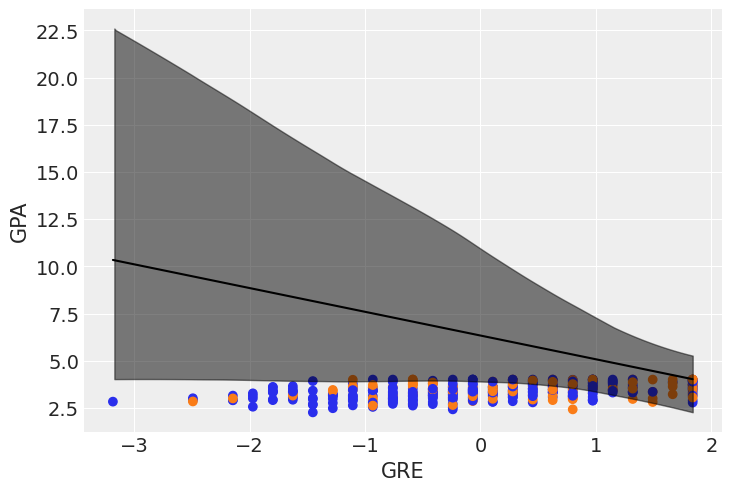

In [22]:
import pymc as pm
import numpy as np
import pandas as pd
import pytensor as pt
import seaborn as sns
import scipy.stats as stats
from scipy.special import expit as logistic
import matplotlib.pyplot as plt
import arviz as az
az.style.use('arviz-darkgrid')

admision = pd.read_csv('./Admission.csv')
print(admision)
old = admision['GRE']
mean = admision['GRE'].mean()
std = admision['GRE'].std()
admision['GRE'] = (admision['GRE'] - mean) / std
admision.head()
print(admision)
df = admision.query("Admission == (0, 1)")
y_1 = pd.Categorical(df['Admission']).codes

x_n = ['GRE', 'GPA']
x_1 = df[x_n].values

with pm.Model() as model_1:
  b0 = pm.Normal('b0', mu=0, sigma=2)
  b = pm.Normal('b', mu=0, sigma=2, shape=len(x_n))
  m = b0 + pm.math.dot(x_1, b)
  t = pm.Deterministic('t', 1 / (1 + pm.math.exp(-m)))
  bd = pm.Deterministic('bd', -b0/b[1] - b[0]/b[1] * x_1[:,0])
  yl = pm.Bernoulli('yl', p=t, observed=y_1)

  idata_1 = pm.sample(2000, return_inferencedata=True)


idx = np.argsort(x_1[:,0])
bd = idata_1.posterior['bd'].mean(("chain", "draw"))[idx]
plt.scatter(x_1[:,0], x_1[:,1], c=[f'C{x}' for x in y_1])
plt.plot(x_1[:,0][idx], bd, color='k');
az.plot_hdi(x_1[:,0], idata_1.posterior['bd'], color='k')
plt.xlabel(x_n[0])
plt.ylabel(x_n[1])

